## Extract reviews of any product from ecommerce website like amazon and perform emotion mining

In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
echo_dot_review = []

## Connecting to Amazom and downloading reviews

In [3]:
for i in range (1,50):
    op=[]
    url ="https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    echo_dot_review = echo_dot_review+op

## Downloading review from Amazon.in for Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)

In [4]:
echo_dot_review = list(set(echo_dot_review))

## Text Pre-processing

In [5]:
txt = ' '.join(echo_dot_review)
txt

" \nReviewing approximately after a year of usage .The device seems to hang a lot, lost a lot of listening capacity and gets disconnected from wifi every now and then .\n \n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Please don't fall into the trap of buying echo dot. I was gifted with an echo dot by my nephew, I had used it for a month and now the echo dot which I received as from my nephew is lying sleeping. I can't use it as it is having internet connectivity issues. I had called support assistance but it came to no help.\n \nEco dot working but bulb could not be synched\n \nIt doesn't even connect to the wifi. I'm stuck in setup mode.It work for 30 mins and boom it no longer works\n \nOne thing is bad .... it's command other's while its bad for connect home appliances ... it's most dangerous\n \nConnect nahi ho raha hai\n \nThe sound is great. Integration of smart devices is what I ordered this for.It has trouble understanding the voice c

In [6]:
# text cleaning
txt = re.sub('[^a-zA-z0-9]', ' ', txt)
txt.lower()

'  reviewing approximately after a year of usage  the device seems to hang a lot  lost a lot of listening capacity and gets disconnected from wifi every now and then                             the media could not be loaded                       please don t fall into the trap of buying echo dot  i was gifted with an echo dot by my nephew  i had used it for a month and now the echo dot which i received as from my nephew is lying sleeping  i can t use it as it is having internet connectivity issues  i had called support assistance but it came to no help    eco dot working but bulb could not be synched   it doesn t even connect to the wifi  i m stuck in setup mode it work for 30 mins and boom it no longer works   one thing is bad      it s command other s while its bad for connect home appliances     it s most dangerous   connect nahi ho raha hai   the sound is great  integration of smart devices is what i ordered this for it has trouble understanding the voice commands 1 out of 3 times 

In [7]:
# text cleaning
txt = txt.strip()
txt

'Reviewing approximately after a year of usage  The device seems to hang a lot  lost a lot of listening capacity and gets disconnected from wifi every now and then                             The media could not be loaded                       Please don t fall into the trap of buying echo dot  I was gifted with an echo dot by my nephew  I had used it for a month and now the echo dot which I received as from my nephew is lying sleeping  I can t use it as it is having internet connectivity issues  I had called support assistance but it came to no help    Eco dot working but bulb could not be synched   It doesn t even connect to the wifi  I m stuck in setup mode It work for 30 mins and boom it no longer works   One thing is bad      it s command other s while its bad for connect home appliances     it s most dangerous   Connect nahi ho raha hai   The sound is great  Integration of smart devices is what I ordered this for It has trouble understanding the voice commands 1 out of 3 times  T

In [8]:
txt_token = word_tokenize(txt)
print(txt_token)

['Reviewing', 'approximately', 'after', 'a', 'year', 'of', 'usage', 'The', 'device', 'seems', 'to', 'hang', 'a', 'lot', 'lost', 'a', 'lot', 'of', 'listening', 'capacity', 'and', 'gets', 'disconnected', 'from', 'wifi', 'every', 'now', 'and', 'then', 'The', 'media', 'could', 'not', 'be', 'loaded', 'Please', 'don', 't', 'fall', 'into', 'the', 'trap', 'of', 'buying', 'echo', 'dot', 'I', 'was', 'gifted', 'with', 'an', 'echo', 'dot', 'by', 'my', 'nephew', 'I', 'had', 'used', 'it', 'for', 'a', 'month', 'and', 'now', 'the', 'echo', 'dot', 'which', 'I', 'received', 'as', 'from', 'my', 'nephew', 'is', 'lying', 'sleeping', 'I', 'can', 't', 'use', 'it', 'as', 'it', 'is', 'having', 'internet', 'connectivity', 'issues', 'I', 'had', 'called', 'support', 'assistance', 'but', 'it', 'came', 'to', 'no', 'help', 'Eco', 'dot', 'working', 'but', 'bulb', 'could', 'not', 'be', 'synched', 'It', 'doesn', 't', 'even', 'connect', 'to', 'the', 'wifi', 'I', 'm', 'stuck', 'in', 'setup', 'mode', 'It', 'work', 'for', 

In [9]:
stop = stopwords.words('english')

In [10]:
corpus = []

for i in txt_token:
    if i not in stop:
        corpus.append(i)

In [11]:
print(corpus)

['Reviewing', 'approximately', 'year', 'usage', 'The', 'device', 'seems', 'hang', 'lot', 'lost', 'lot', 'listening', 'capacity', 'gets', 'disconnected', 'wifi', 'every', 'The', 'media', 'could', 'loaded', 'Please', 'fall', 'trap', 'buying', 'echo', 'dot', 'I', 'gifted', 'echo', 'dot', 'nephew', 'I', 'used', 'month', 'echo', 'dot', 'I', 'received', 'nephew', 'lying', 'sleeping', 'I', 'use', 'internet', 'connectivity', 'issues', 'I', 'called', 'support', 'assistance', 'came', 'help', 'Eco', 'dot', 'working', 'bulb', 'could', 'synched', 'It', 'even', 'connect', 'wifi', 'I', 'stuck', 'setup', 'mode', 'It', 'work', '30', 'mins', 'boom', 'longer', 'works', 'One', 'thing', 'bad', 'command', 'bad', 'connect', 'home', 'appliances', 'dangerous', 'Connect', 'nahi', 'ho', 'raha', 'hai', 'The', 'sound', 'great', 'Integration', 'smart', 'devices', 'I', 'ordered', 'It', 'trouble', 'understanding', 'voice', 'commands', '1', '3', 'times', 'The', 'placement', 'mic', 'good', 'My', 'Alexa', 'working', 'Do

## Feature extraction

In [12]:
# TfIdf
tf = TfidfVectorizer()

data = tf.fit_transform(corpus)
data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
print(tf.vocabulary_)

{'reviewing': 66, 'approximately': 3, 'year': 90, 'usage': 81, 'the': 75, 'device': 19, 'seems': 67, 'hang': 34, 'lot': 47, 'lost': 46, 'listening': 43, 'capacity': 12, 'gets': 29, 'disconnected': 21, 'wifi': 86, 'every': 27, 'media': 49, 'could': 17, 'loaded': 44, 'please': 62, 'fall': 28, 'trap': 78, 'buying': 9, 'echo': 24, 'dot': 23, 'gifted': 30, 'nephew': 57, 'used': 83, 'month': 54, 'received': 65, 'lying': 48, 'sleeping': 69, 'use': 82, 'internet': 39, 'connectivity': 16, 'issues': 40, 'called': 10, 'support': 73, 'assistance': 4, 'came': 11, 'help': 35, 'eco': 25, 'working': 88, 'bulb': 7, 'synched': 74, 'it': 41, 'even': 26, 'connect': 15, 'stuck': 72, 'setup': 68, 'mode': 52, 'work': 87, '30': 0, 'mins': 51, 'boom': 6, 'longer': 45, 'works': 89, 'one': 59, 'thing': 76, 'bad': 5, 'command': 13, 'home': 37, 'appliances': 2, 'dangerous': 18, 'nahi': 56, 'ho': 36, 'raha': 64, 'hai': 33, 'sound': 71, 'great': 32, 'integration': 38, 'smart': 70, 'devices': 20, 'ordered': 60, 'trou

In [14]:
df = pd.DataFrame(data.toarray(), columns=tf.get_feature_names_out())
df

,30,alexa,appliances,approximately,assistance,bad,boom,bulb,buy,buying,...,usage,use,used,voice,waste,wifi,work,working,works,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
words = ' '.join(df)

In [16]:
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200

Text(0.5, 1.0, 'WordCloud')

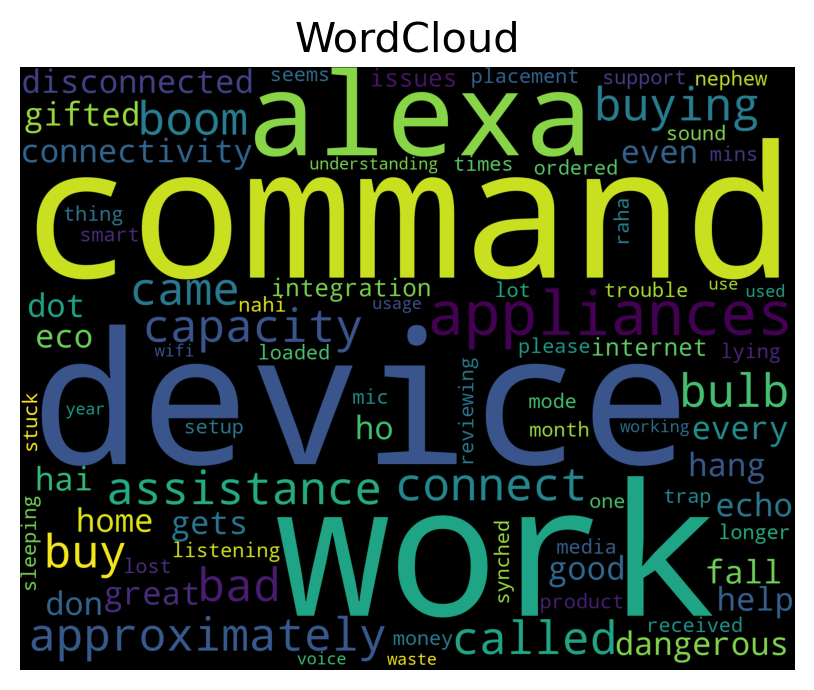

In [17]:
wordcloud = WordCloud(background_color='black', width=1800, height=1400).generate(words)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('WordCloud', size=15)

## Sentiment Analysis

In [18]:
with open(r"C:\Users\rohit\Downloads\Assignments\data science assignment\15-Text Mining\positive-words.txt","r") as p:
    positive = p.read().split("\n")

In [19]:
positive = positive[35:]
positive

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [20]:
len(positive)

2007

In [21]:
with open(r"C:\Users\rohit\Downloads\Assignments\data science assignment\15-Text Mining\negative-words.txt", "r",encoding='latin') as n:
    negative = n.read().split("\n")

In [22]:
negative = negative[36:]
negative

['2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 

In [23]:
len(negative)

4783

## Negative Wordcloud

In [24]:
negative_txt = ' '.join([word for word in df if word in negative])

Text(0.5, 1.0, 'Negative-WordCloud')

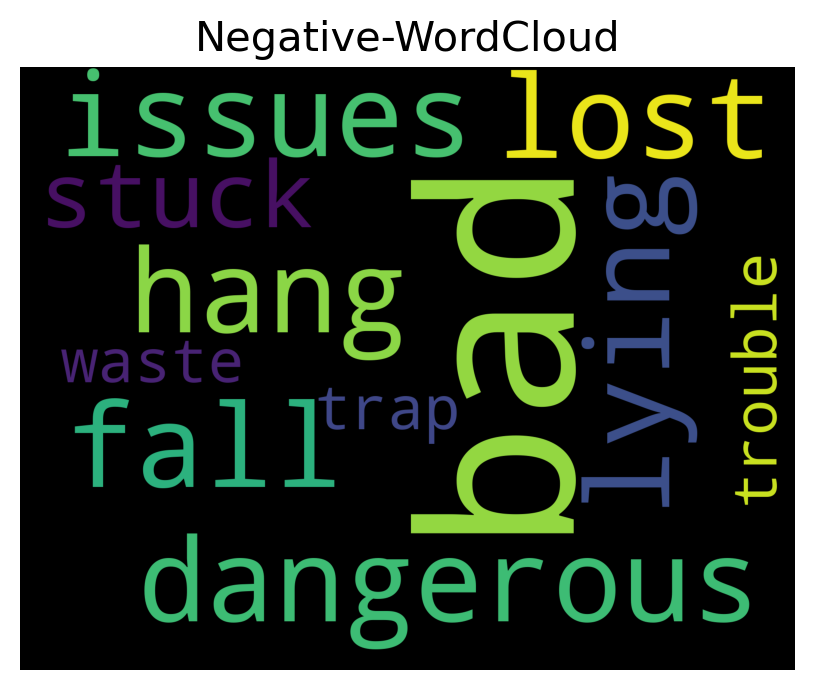

In [25]:
negative_wordcloud = WordCloud(background_color='black', width=1800, height=1400).generate(negative_txt)
plt.axis('off')
plt.imshow(negative_wordcloud)
plt.title('Negative-WordCloud', size=15)

## Positive Wordcloud

In [26]:
positive_txt = ' '.join([word for word in df if word in positive])

Text(0.5, 1.0, 'Positive-WordCloud')

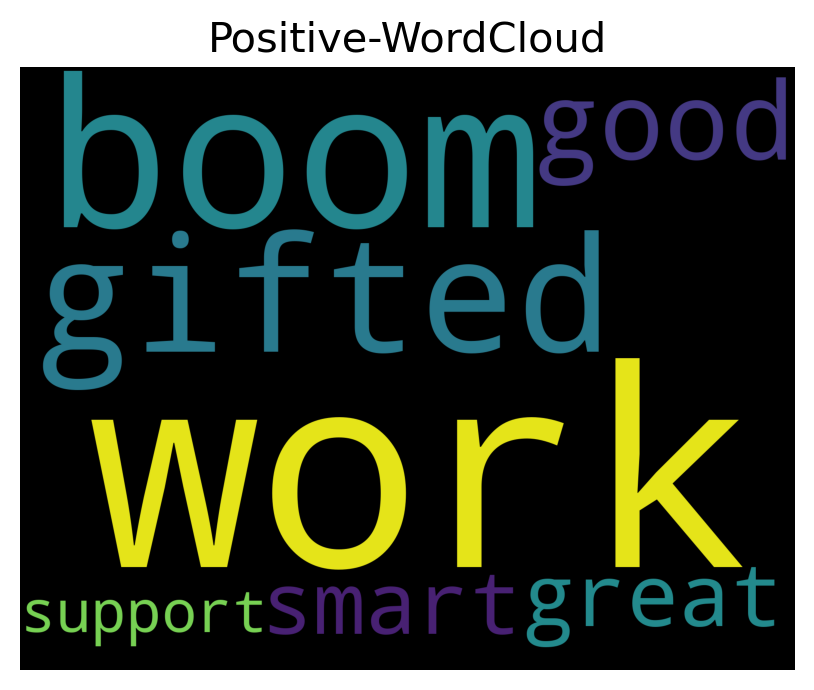

In [27]:
positive_wordcloud = WordCloud(background_color='black', width=1800, height=1400).generate(positive_txt)
plt.axis('off')
plt.imshow(positive_wordcloud)
plt.title('Positive-WordCloud', size=15)